In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from matplotlib import rcParams

dataset=pd.read_csv("/home/akanksha/DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')

# Adding first name and last name together to create new column
dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str)
data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range
lower_range,upper_range=outlier_treatment(data['Product Price'])
data.drop(data[(data['Product Price'] < lower_range) | (data['Product Price'] > upper_range)].index , inplace=True)
train_data=data.copy()
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)
#Dropping columns with repeated values
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status', 'order date (DateOrders)'], axis=1, inplace=True)

le = preprocessing.LabelEncoder()
train_data['Order Country']  = le.fit_transform(train_data['Order Country'])
train_data['Order State']    = le.fit_transform(train_data['Order State'])

#Fraud Prediction
Xf=train_data[['Days for shipping (real)','Days for shipment (scheduled)','Order Country']]
yf=train_data['fraud']
train_x,test_x,train_y,test_y = train_test_split(Xf,yf,test_size = 0.2, random_state = 42)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y.values.ravel())
random_forest.score(train_x, train_y)

#Late Delivery Prediction
Xl=train_data[['Days for shipment (scheduled)','Order Country']]
yl=train_data['late_delivery']
train_xl,test_xl,train_yl,test_yl = train_test_split(Xl,yl,test_size = 0.2, random_state = 42)
random_forest_l = RandomForestClassifier(n_estimators=100)
random_forest_l.fit(train_xl, train_yl.values.ravel())
random_forest_l.score(train_xl, train_yl)


0.9471829999439682


In [3]:
import seaborn as sns
# rcParams['figure.figsize'] = 20,30
# sns.set(rc={'figure.figsize':(11.7,30)})

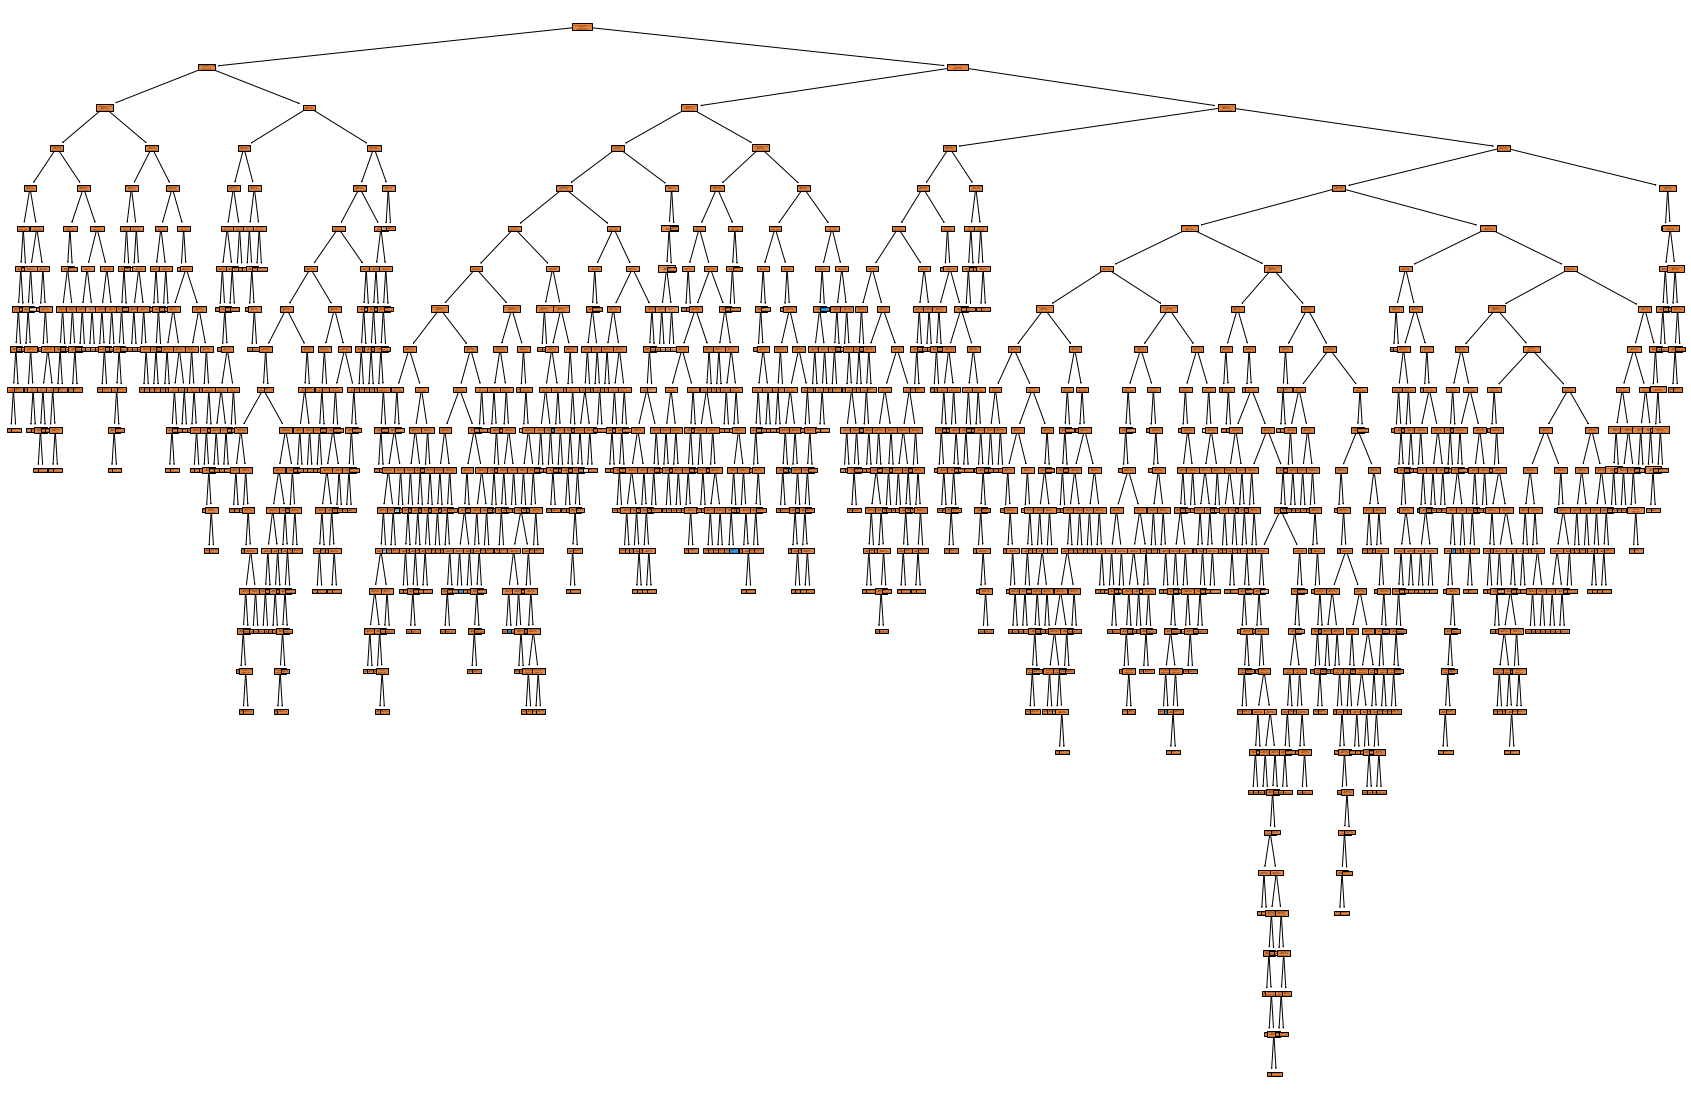

In [4]:

plt.figure(figsize=(30,20))
plot_tree(random_forest.estimators_[0], feature_names=Xf.columns, filled=True)
plt.show()


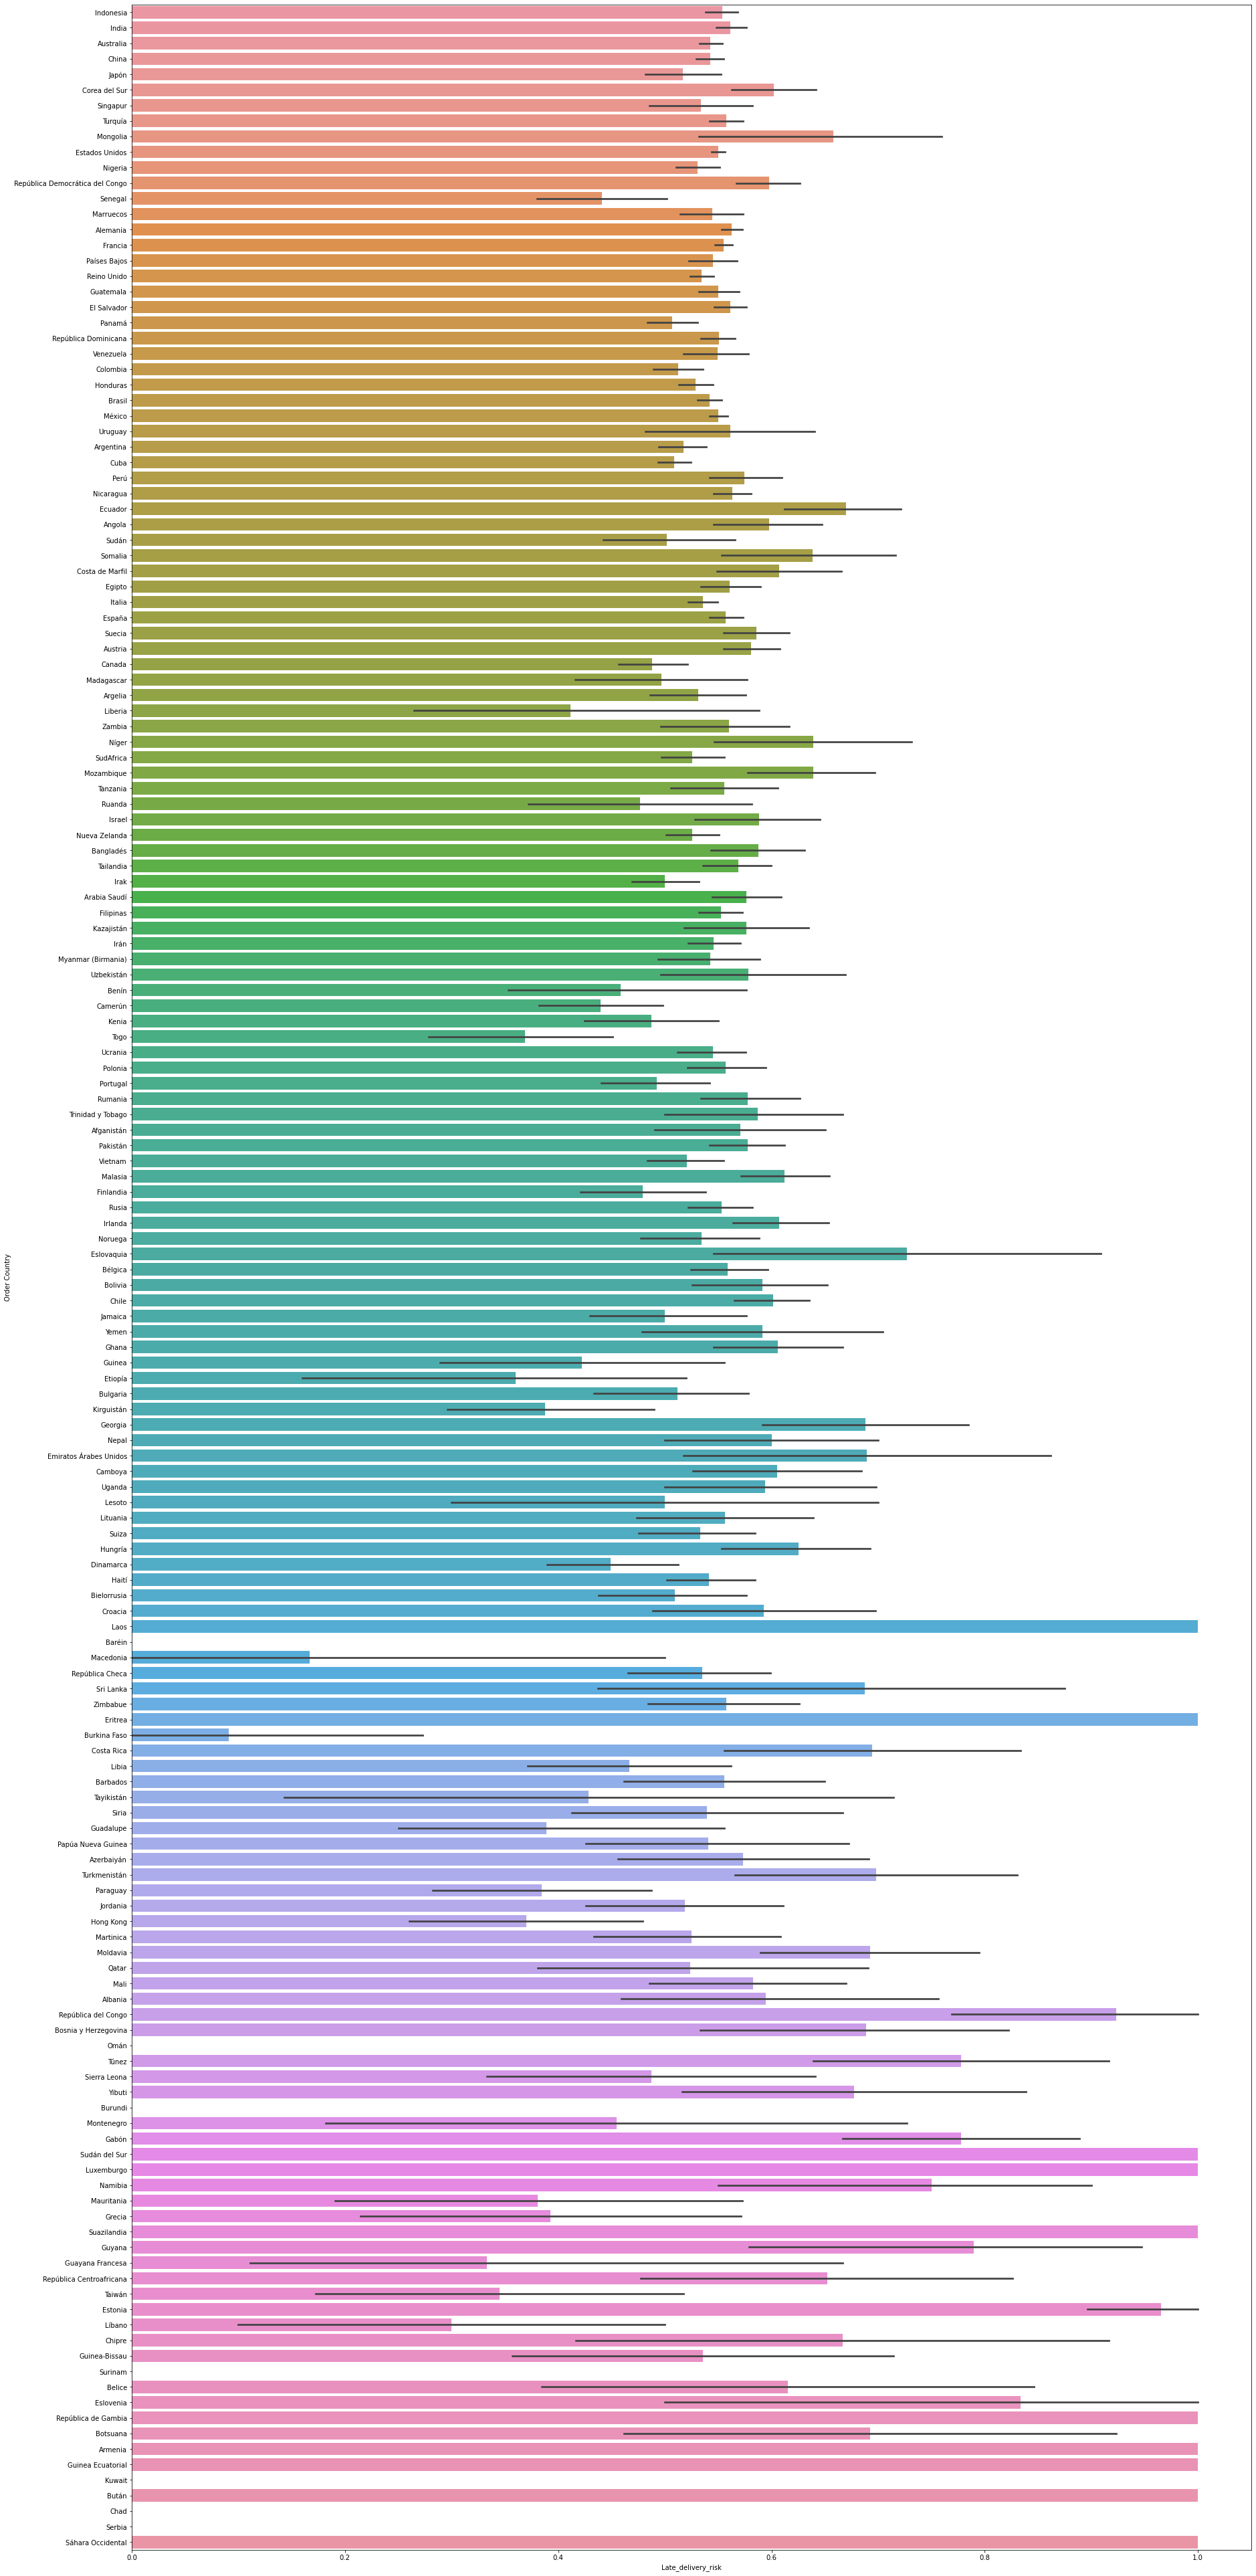

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,70))
sns.barplot(x='Late_delivery_risk',y='Order Country', data=dataset)
plt.show()


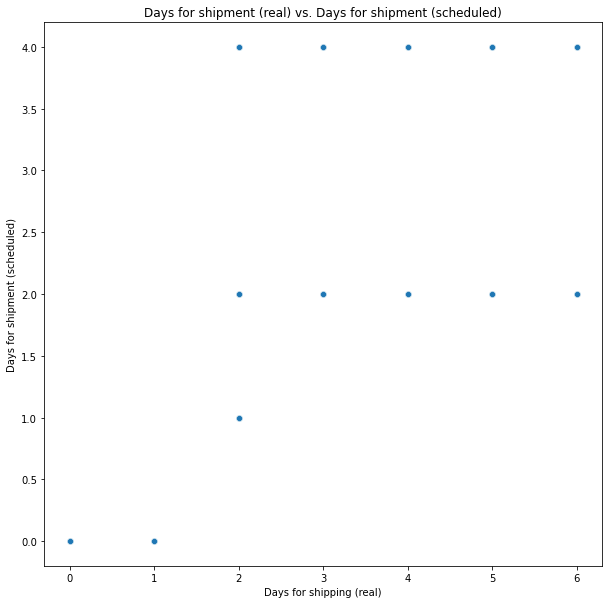

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Days for shipping (real)', y='Days for shipment (scheduled)', data=dataset)
plt.title('Days for shipment (real) vs. Days for shipment (scheduled)')
plt.show()


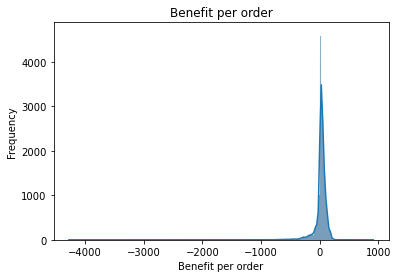

<Figure size 3600x3600 with 0 Axes>

In [9]:
# Create a histogram to show the distribution of delivery times
sns.histplot(data=dataset, x='Benefit per order', kde = True)
plt.title('Benefit per order')
plt.xlabel('Benefit per order')
plt.ylabel('Frequency')
plt.figure(figsize=(50,50))
plt.show()




In [ ]:
# # Create a bar chart to show the number of late deliveries per day of the week
# late_deliveries = delivery_data[delivery_data['is_late'] == True]
# late_deliveries_by_day = late_deliveries.groupby('day_of_week')['delivery_id'].count().reset_index()
# sns.barplot(x='day_of_week', y='delivery_id', data=late_deliveries_by_day)
# plt.title('Number of Late Deliveries by Day of Week')
# plt.xlabel('Day of Week')
# plt.ylabel('Number of Late Deliveries')
# plt.show()